In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

from libs import encode_float_filename, decode_float_filename, compute_f1_scores, compute_weighted_f1_score, quadratic_weighted_kappa
from libs.MarkovModel import generate_balanced_thresholds
from libs.MarkovModel import assign_groups

In [13]:
dbParams_list = [0.01, 0.15]
direction_list = ["forward", "backward"]
#dbParams_list = [0.01]
#direction_list = ["forward"]
mode_list = ["fixed", "adaptive"]
LEN_period = 1000
verbose = False
train_version = "ratio_0_5"
lenWindow_list = [10, 20, 30]

def GetResults(dbParams, direction, mode, lenWindow, train_version):
    dbpString = encode_float_filename(dbParams)
    with open(f"Results/TrafficPredictor/evaluate/{train_version}/CA/{direction}_{lenWindow}_{mode}_{dbpString}_train.pkl", "rb") as file:
        resultsCA_Train = pickle.load(file)
    with open(f"Results/TrafficPredictor/evaluate/{train_version}/CA/{direction}_{lenWindow}_{mode}_{dbpString}_test.pkl", "rb") as file:
        resultsCA_Test = pickle.load(file)

    return resultsCA_Train['trafficTarget_actual'], resultsCA_Train['trafficTarget_predicted'], resultsCA_Test['trafficTarget_actual'], resultsCA_Test['trafficTarget_predicted']   


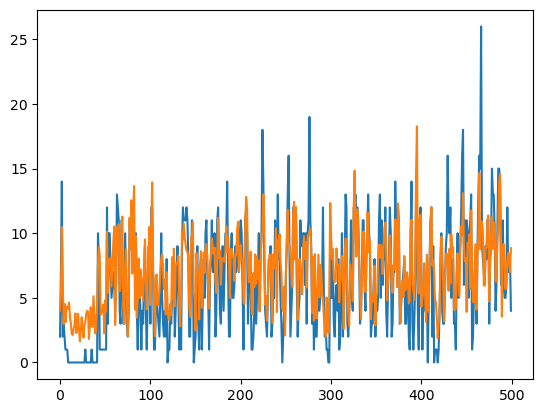

In [18]:
train_actual, train_predicted, test_actual, test_predicted = GetResults(0.01, "forward", "fixed", 30, train_version)
plt.plot(test_actual[0:500])
plt.plot(test_predicted[0:500])
